In [ ]:
#!pip install lazypredict
import numpy as np
import keras
from keras import layers
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, GRU
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
import pandas as pd
from prophet import Prophet
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestCentroid, KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC, LinearSVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.linear_model import SGDClassifier, LogisticRegression, RidgeClassifier, RidgeClassifierCV, PassiveAggressiveClassifier, Perceptron
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, accuracy_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.semi_supervised import LabelSpreading, LabelPropagation
from sklearn.linear_model import Perceptron, RidgeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,46.56,46.88,45.78,46.09,24.70,4642400
2000-01-04,45.56,45.78,44.38,44.41,23.79,7822200
2000-01-05,44.41,45.41,44.22,44.88,24.05,8229600
2000-01-06,45.16,46.97,45.06,46.28,24.80,5356400
2000-01-07,47.06,48.47,46.81,48.25,25.85,9863800
...,...,...,...,...,...,...
2024-02-22,158.98,160.74,157.77,160.45,160.45,8065000
2024-02-23,160.88,162.25,160.16,161.84,161.84,6726000
2024-02-26,161.80,162.01,160.57,160.79,160.79,5465400


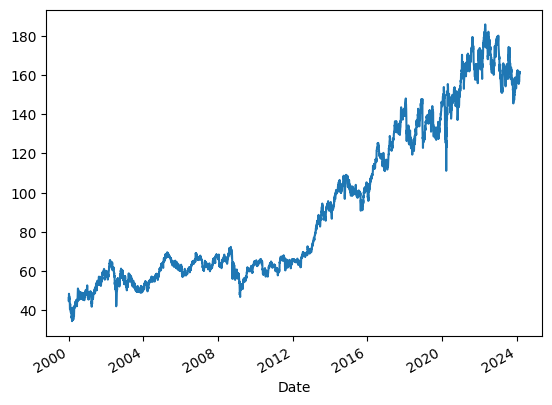

In [ ]:

import pandas as pd
from prophet import Prophet
import yfinance as yf

# Define the ticker symbols for the car manufacturing companies
#tickers = ['TM', 'VOW3.DE', 'GM', 'F', 'HMC', 'BMW.DE',  'TSLA', 'NSANY', 'HYMTF', 'INTC', 'NVDA', 'AMD', 'QCOM', 'MU', 'TXN', 'AVGO', 'AMAT', 'ADI', 'AMD']
tickers = ['JNJ']
#VOLV-B.ST PE AIK MODEL 96 DE RAHA
#JNJ PE 77% ACCURACY
# Create an empty DataFrame to store closing prices
closing_prices = pd.DataFrame()

# Download historical data for each company
for ticker in tickers:
    data = yf.download(ticker, start='2000-01-01', end='2024-02-29')
    closing_prices = data

# Drop any missing values
closing_prices.dropna(inplace=True)

# Display the closing prices DataFrame
display(closing_prices)

# jnj k lie ye sb se fir Model: GaussianNB
#Accuracy: 0.77
##              precision    recall  f1-score   support

#           0       0.77      1.00      0.87      1321
#           1       0.60      0.01      0.03       405

 #  accuracy                           0.77      1726
 #  macro avg       0.68      0.51      0.45      1726
#weighted avg       0.73      0.77      0.67      1726

closing_prices['Close'].plot()
df=closing_prices


In [ ]:
df['Price Change'] = df['Close'].diff()
import numpy as np
# Calculate gains and losses
df['Gain'] = np.where(df['Price Change'] > 0, df['Price Change'], 0)
df['Loss'] = np.where(df['Price Change'] < 0, -df['Price Change'], 0)

# Calculate average gains and average losses (using a 14-day period)
window = 14
df['Average Gain'] = df['Gain'].rolling(window=window).mean()
df['Average Loss'] = df['Loss'].rolling(window=window).mean()

# Calculate relative strength (RS)
df['RS'] = df['Average Gain'] / df['Average Loss']

# Calculate RSI
df['RSI'] = 100 - (100 / (1 + df['RS']))

# Calculate 12-day EMA
df['EMA12'] = df['Close'].ewm(span=12, min_periods=12).mean()

# Calculate 26-day EMA
df['EMA26'] = df['Close'].ewm(span=26, min_periods=26).mean()

# Calculate MACD line
df['MACD'] = df['EMA12'] - df['EMA26']

# Calculate signal line (9-day EMA of MACD)
df['Signal Line'] = df['MACD'].ewm(span=9, min_periods=9).mean()

# Calculate MACD histogram
df['MACD Histogram'] = df['MACD'] - df['Signal Line']

display(df[['Close', 'RSI', 'MACD', 'Signal Line', 'MACD Histogram']])
#closing_prices.to_csv('VOLVO.csv')
closing_prices= df.dropna()
closing_prices['tomorrows_closing'] = closing_prices['Close'].shift(-1)
closing_prices
#SETTING 1, BLKUL START MA ASTYPE KARDO
closing_prices['Direction'] = (closing_prices['tomorrows_closing'] > closing_prices['Close']).astype(int)
#AGAR WHOLE NUMBERS MAIN SAME HI RATE RAHA HAI TO 0 DAL DO, UP GYA HAI TO 1 AND US SE NECHE GYA HAI TO -1 DL DO , SOTHAT 3 DIFFERENT CLASSES BAN JAEN
df= closing_prices
df
df.corr()
#df=df.astype(int)
print('Our dataframe before applying')
display(df)
df.to_csv(str(tickers)+'.csv')

,Close,RSI,MACD,Signal Line,MACD Histogram
Date,,,,,
2000-01-03,46.09,NaN,NaN,NaN,NaN
2000-01-04,44.41,NaN,NaN,NaN,NaN
2000-01-05,44.88,NaN,NaN,NaN,NaN
2000-01-06,46.28,NaN,NaN,NaN,NaN
2000-01-07,48.25,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2024-02-22,160.45,55.97,-0.08,-0.30,0.22
2024-02-23,161.84,65.27,0.23,-0.20,0.43
2024-02-26,160.79,64.36,0.39,-0.08,0.47


Our dataframe before applying


,Open,High,Low,Close,Adj Close,Volume,Price Change,Gain,Loss,Average Gain,Average Loss,RS,RSI,EMA12,EMA26,MACD,Signal Line,MACD Histogram,tomorrows_closing,Direction
Date,,,,,,,,,,,,,,,,,,,,
2000-02-18,39.25,39.47,38.44,38.72,20.82,8246200,-0.88,0.00,0.88,0.13,0.44,0.29,22.62,40.04,41.20,-1.15,-1.15,-0.00,39.31,1
2000-02-22,39.00,39.53,38.38,39.31,21.14,7307400,0.59,0.59,0.00,0.17,0.39,0.43,30.28,39.93,41.05,-1.12,-1.14,0.03,38.06,0
2000-02-23,39.06,39.16,38.06,38.06,20.47,8293200,-1.25,0.00,1.25,0.15,0.48,0.31,23.76,39.64,40.81,-1.17,-1.15,-0.02,36.88,0
2000-02-24,37.50,37.62,36.00,36.88,19.83,18512800,-1.19,0.00,1.19,0.15,0.49,0.30,23.34,39.22,40.50,-1.29,-1.18,-0.11,36.00,0
2000-02-25,36.28,36.31,35.16,36.00,19.36,13221400,-0.88,0.00,0.88,0.15,0.51,0.29,22.64,38.72,40.15,-1.43,-1.23,-0.20,36.38,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-22,158.98,160.74,157.77,160.45,160.45,8065000,1.77,1.77,0.00,0.70,0.55,1.27,55.97,158.04,158.11,-0.08,-0.30,0.22,161.84,1
2024-02-23,160.88,162.25,160.16,161.84,161.84,6726000,1.39,1.39,0.00,0.80,0.42,1.88,65.27,158.62,158.39,0.23,-0.20,0.43,160.79,0
2024-02-26,161.80,162.01,160.57,160.79,160.79,5465400,-1.05,0.00,1.05,0.80,0.44,1.81,64.36,158.95,158.57,0.39,-0.08,0.47,160.98,1


Direction
1   0.51
0   0.49
Name: proportion, dtype: float64


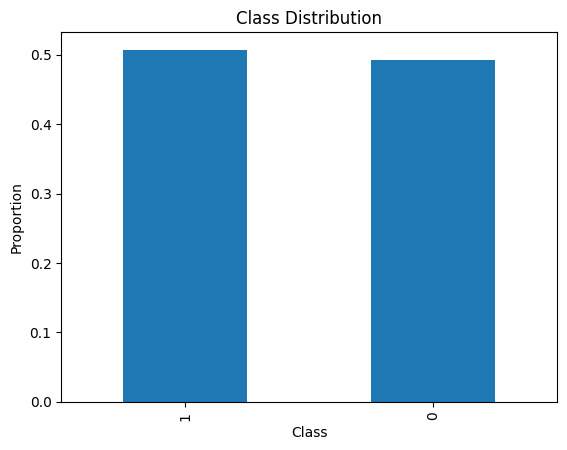

,Close,Volume,Price Change,Gain,Loss,Average Gain,Average Loss,RS,RSI,EMA12,EMA26,MACD,Signal Line,MACD Histogram
Date,,,,,,,,,,,,,,
2000-02-18,38.72,8246200,-0.88,0.00,0.88,0.13,0.44,0.29,22.62,40.04,41.20,-1.15,-1.15,-0.00
2000-02-22,39.31,7307400,0.59,0.59,0.00,0.17,0.39,0.43,30.28,39.93,41.05,-1.12,-1.14,0.03
2000-02-23,38.06,8293200,-1.25,0.00,1.25,0.15,0.48,0.31,23.76,39.64,40.81,-1.17,-1.15,-0.02
2000-02-24,36.88,18512800,-1.19,0.00,1.19,0.15,0.49,0.30,23.34,39.22,40.50,-1.29,-1.18,-0.11
2000-02-25,36.00,13221400,-0.88,0.00,0.88,0.15,0.51,0.29,22.64,38.72,40.15,-1.43,-1.23,-0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-20,130.87,6563500,-2.28,0.00,2.28,0.76,1.59,0.48,32.42,132.49,135.64,-3.15,-2.93,-0.21
2018-02-21,129.91,6578000,-0.96,0.00,0.96,0.76,1.35,0.56,36.01,132.10,135.22,-3.12,-2.97,-0.15
2018-02-22,129.91,5732200,0.00,0.00,0.00,0.63,1.35,0.47,31.80,131.76,134.82,-3.06,-2.99,-0.07


,Direction
Date,
2000-02-18,1
2000-02-22,0
2000-02-23,0
2000-02-24,0
2000-02-25,1
...,...
2018-02-20,0
2018-02-21,0
2018-02-22,1


,Close,Volume,Price Change,Gain,Loss,Average Gain,Average Loss,RS,RSI,EMA12,EMA26,MACD,Signal Line,MACD Histogram
Date,,,,,,,,,,,,,,
2018-02-27,131.67,7158600,-0.40,0.00,0.40,0.68,0.69,0.98,49.58,131.82,134.22,-2.41,-2.79,0.38
2018-02-28,129.88,7985900,-1.79,0.00,1.79,0.68,0.79,0.86,46.27,131.52,133.90,-2.38,-2.71,0.32
2018-03-01,127.28,9424000,-2.60,0.00,2.60,0.68,0.62,1.11,52.53,130.87,133.41,-2.55,-2.67,0.13
2018-03-02,128.82,6910400,1.54,1.54,0.00,0.57,0.62,0.92,47.86,130.55,133.07,-2.52,-2.64,0.12
2018-03-05,129.79,5799800,0.97,0.97,0.00,0.58,0.62,0.94,48.57,130.43,132.83,-2.39,-2.59,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-21,158.68,7473300,0.82,0.82,0.00,0.57,0.59,0.97,49.32,157.60,157.93,-0.33,-0.36,0.03
2024-02-22,160.45,8065000,1.77,1.77,0.00,0.70,0.55,1.27,55.97,158.04,158.11,-0.08,-0.30,0.22
2024-02-23,161.84,6726000,1.39,1.39,0.00,0.80,0.42,1.88,65.27,158.62,158.39,0.23,-0.20,0.43


,Direction
Date,
2018-02-27,0
2018-02-28,0
2018-03-01,1
2018-03-02,1
2018-03-05,0
...,...
2024-02-21,1
2024-02-22,1
2024-02-23,0


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
# Assuming y is a pandas Series
class_distribution = df['Direction'].value_counts(normalize=True)

print(class_distribution)


class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.title('Class Distribution')
plt.show()

train_percentage = 0.75

split_index = int(train_percentage * len(df))
df=df.dropna()
train_data = df.iloc[:split_index]
test_data = df.iloc[split_index:]
X_train= train_data[['Close',	'Volume',	'Price Change',	'Gain',	'Loss'	,'Average Gain'	,'Average Loss',	'RS',	'RSI'	,'EMA12',	'EMA26'	,'MACD'	,'Signal Line',	'MACD Histogram'	]	]
y_train= train_data[['Direction']]
#,'High',	'Low'	,'Close','Volume'
X_validate= test_data[['Close',	'Volume',	'Price Change',	'Gain',	'Loss'	,'Average Gain'	,'Average Loss',	'RS',	'RSI'	,'EMA12',	'EMA26'	,'MACD'	,'Signal Line',	'MACD Histogram']	]
y_validate= test_data[['Direction']]
display(X_train)
display(y_train)
display(X_validate)
display(y_validate)

In [ ]:
df=df.dropna()
#df.isna().sum()
X_train.isna().sum()
#aik alag setting vo ye k tomoroorw ka col banany k baad as tpye int karo,aik test karo phle kar
#ke

Close             0
Volume            0
Price Change      0
Gain              0
Loss              0
Average Gain      0
Average Loss      0
RS                0
RSI               0
EMA12             0
EMA26             0
MACD              0
Signal Line       0
MACD Histogram    0
dtype: int64

In [ ]:
#sequential data ho to train split kese karte
# scale karny se koi faida hota bhi hai ya nnai

#X_train, x_validate, y_train, y_validate = train_test_split(X, Y, test_size=0.20, random_state=42)


#X_train_array = X_train.values
#X_validate_array = x_validate.values

#_train_reshaped = X_train_array.reshape(X_train_array.shape[0], -1, 1)
#X_validate_reshaped = X_validate_array.reshape(X_validate_array.shape[0], -1, 1)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_validate_scaled = scaler.transform(X_validate)


In [ ]:
#!pip install shap

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, accuracy_score, precision_score
import shap

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier



fd [0]
Precision 0.5340909090909091
Model: XGBClassifier
Recall: 0.48516129032258065
Accuracy: 0.5185430463576159


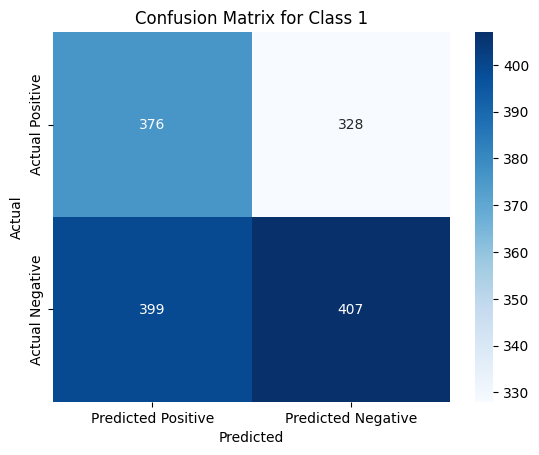

In [ ]:
models = {
    "NearestCentroid": NearestCentroid(),
    "BernoulliNB": BernoulliNB(),
    "GaussianNB": GaussianNB(),
    "SGDClassifier": SGDClassifier(),
    "LGBMClassifier": LGBMClassifier(),
    "QuadraticDiscriminantAnalysis": QuadraticDiscriminantAnalysis(),
    "ExtraTreeClassifier": ExtraTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "ExtraTreesClassifier": ExtraTreesClassifier(),
    "XGBClassifier": XGBClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "BaggingClassifier": BaggingClassifier(),
    "LinearDiscriminantAnalysis": LinearDiscriminantAnalysis(),
    "RidgeClassifierCV": RidgeClassifierCV(),
    "CalibratedClassifierCV": CalibratedClassifierCV(),
    "LinearSVC": LinearSVC(),
    "LogisticRegression": LogisticRegression(),
    "PassiveAggressiveClassifier": PassiveAggressiveClassifier(),
    "LabelSpreading": LabelSpreading(),
    "LabelPropagation": LabelPropagation(),
    "Perceptron": Perceptron(),
    "DummyClassifier": DummyClassifier(),
    "SVC": SVC(),
    "RidgeClassifier": RidgeClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "LogisticRegressionCV": LogisticRegressionCV(),
    "MLPClassifier": MLPClassifier(),
    "VotingClassifier": VotingClassifier(estimators=[
        ('lr', LogisticRegression()),
        ('rf', RandomForestClassifier()),
        ('lgbm', LGBMClassifier())]),
    "StackingClassifier": StackingClassifier(estimators=[
        ('lr', LogisticRegression()),
        ('rf', RandomForestClassifier()),
        ('lgbm', LGBMClassifier())],
        final_estimator=LogisticRegression()),
    "HistGradientBoostingClassifier": HistGradientBoostingClassifier()
}
X_new = [
    [142.69,1850300,-1.27000427246093,0, 1.27000427246093, 0.665000915527343,0.511428833007812, 1.30028045469463 , 56.5270400850859,142.812689433261 , 142.187095672377, 0.625593760883788, 0.398265172753832, 0.227328588129955]   # New example 1: Age 30, Income $55,000, Purchase history 1
]
# Iterate over models
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_validate)
    newpred = model.predict(X_new)
    # Evaluate
    print('fd', newpred)

    accuracy = accuracy_score(y_validate, y_pred)
    precision = precision_score(y_validate, y_pred)
    print('Precision', precision)
    print(f"Model: {name}")

    recall = recall_score(y_validate, y_pred)
    accuracy = accuracy_score(y_validate, y_pred)
    cm = confusion_matrix(y_validate, y_pred)

    print("Recall:", recall)
    print("Accuracy:", accuracy)



    # Extract the relevant entries for the specific class
    tn, fp, fn, tp = cm.ravel()

    # Create the confusion matrix for class 1
    binary_confusion_matrix = [[tp, fp],
                              [fn, tn]]

    # Plotting the confusion matrix
    sns.heatmap(binary_confusion_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicted Positive', 'Predicted Negative'], yticklabels=['Actual Positive', 'Actual Negative'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Class 1')
    plt.show()
#RIDGECLASSIFIER  VZ PE 1 KI BIH ZIADA PRECISION DE RAHA, NVDA PE BHI RIDGE 1 KI ACHI DE RAH

#LGBMClassifier 0.68 OF 1, XGBCLASIFER

In [ ]:

# from lazypredict.Supervised import LazyClassifier
# lazy=LazyClassifier()
# #models,predict=lazy.fit(X_train_scaled, X_validate_scaled, y_train, y_validate )
# #X_train, x_validate, y_train, y_validate
# models,predict=lazy.fit(X_train, X_validate, y_train, y_validate )

# print(models)

 97%|█████████▋| 28/29 [00:28<00:01,  1.04s/it]

[LightGBM] [Info] Number of positive: 2291, number of negative: 2242
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3570
[LightGBM] [Info] Number of data points in the train set: 4533, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505405 -> initscore=0.021620
[LightGBM] [Info] Start training from score 0.021620


100%|██████████| 29/29 [00:28<00:00,  1.01it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.52               0.52     0.52      0.52   
LogisticRegression                 0.52               0.52     0.52      0.52   
RandomForestClassifier             0.51               0.52     0.52      0.49   
AdaBoostClassifier                 0.51               0.52     0.52      0.46   
KNeighborsClassifier               0.51               0.52     0.52      0.51   
RidgeClassifierCV                  0.51               0.51     0.51      0.51   
RidgeClassifier                    0.51               0.51     0.51      0.51   
ExtraTreesClassifier               0.51               0.51     0.51      0.49   
LabelSpreading                     0.51               0.51     0.51      0.50   
LabelPropagation                   0.51               0.51     0.51      0.51   
CalibratedClassifierCV      

Model: XGBClassifier
Precision: 0.5340909090909091
Recall: 0.48516129032258065
Accuracy: 0.5185430463576159


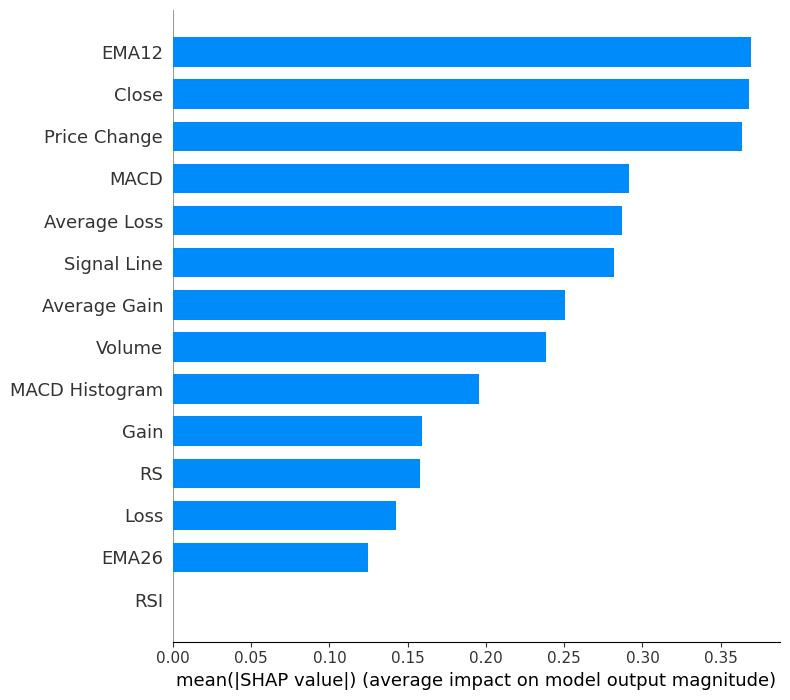

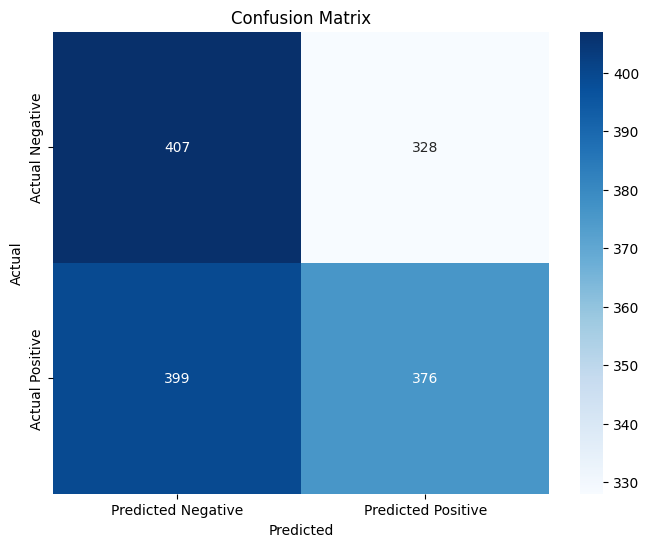

In [ ]:
from xgboost import XGBClassifier
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Initialize XGBClassifier
model = XGBClassifier()

# Fit the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_validate)
accuracy = accuracy_score(y_validate, y_pred)
precision = precision_score(y_validate, y_pred)
recall = recall_score(y_validate, y_pred)
cm = confusion_matrix(y_validate, y_pred)

print("Model: XGBClassifier")
print('Precision:', precision)
print('Recall:', recall)
print('Accuracy:', accuracy)

# Calculate Shapley values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_validate)

# Plot feature importance
shap.summary_plot(shap_values, X_validate, plot_type="bar")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


 97%|=================== | 4403/4533 [00:19<00:00]       

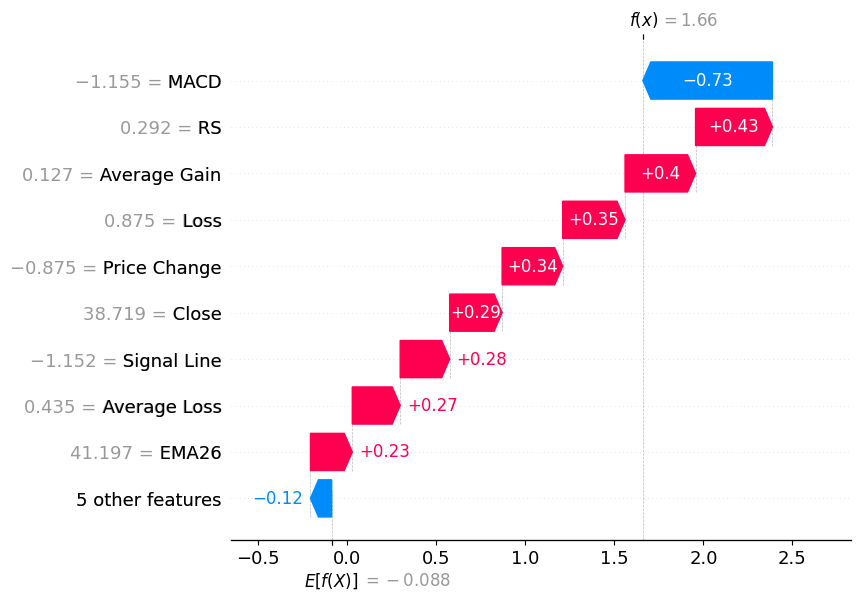

In [ ]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)
shap.waterfall_plot(shap_values[0])


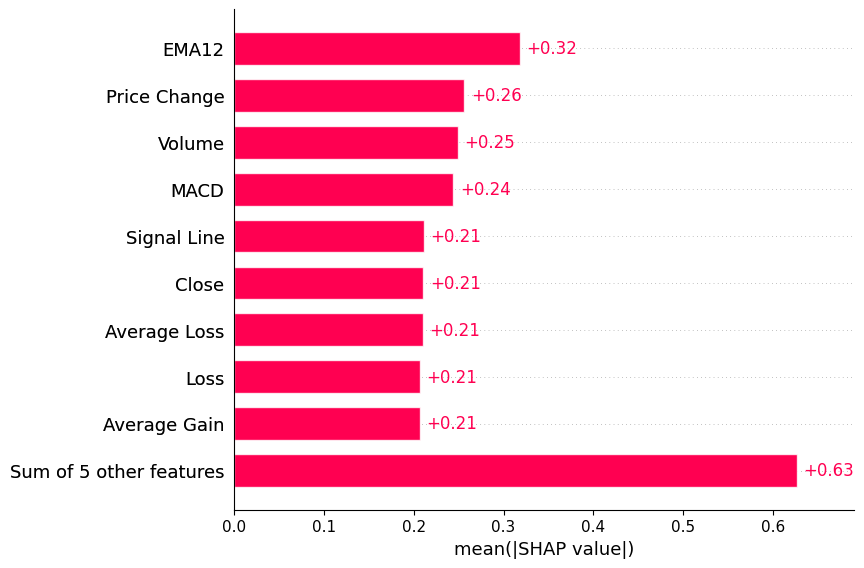

In [ ]:
shap.plots.bar(shap_values.abs.mean(0))


 98%|===================| 4437/4533 [00:26<00:00]       

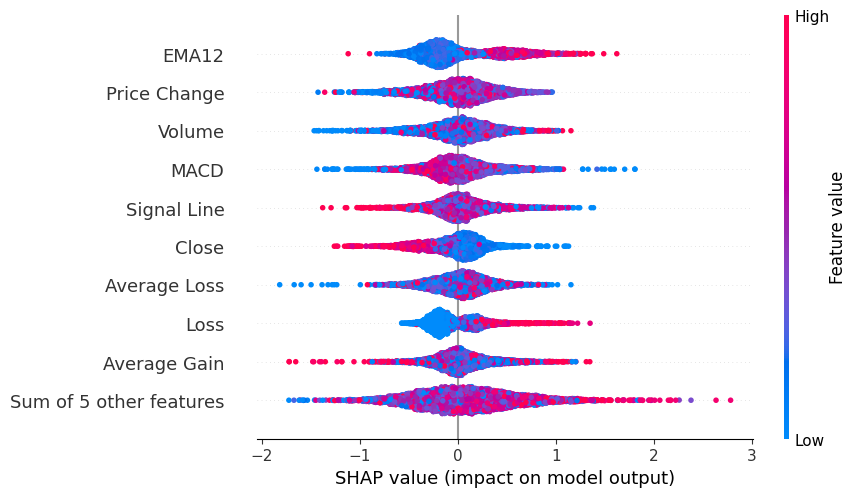

In [ ]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)
shap.plots.beeswarm(shap_values)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import precision_score, classification_report
import shap
class PrecisionCallback(Callback):
    def __init__(self, X_val, y_val):
        self.X_val = X_val
        self.y_val = y_val

    def on_epoch_end(self, epoch, logs=None):
        # Predict probabilities on validation set
        y_pred_prob = self.model.predict(self.X_val)

        # Convert probabilities to binary predictions using a threshold (e.g., 0.5)
        y_pred_binary = (y_pred_prob > 0.5).astype(int)

        # Compute precision using sklearn
        precision = classification_report(self.y_val, y_pred_binary)

        # Print precision
        print(f'Precision: {precision}')

# Create an instance of PrecisionCallback
precision_callback = PrecisionCallback(X_validate, y_validate)



X_train_array = X_train.values
X_validate_array = X_validate.values

X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], -1, 1)
X_validate_reshaped = X_validate_array.reshape(X_validate_array.shape[0], -1, 1)


# Build the LSTM model
model_lstm_simple = keras.Sequential([
    layers.LSTM(128, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
        layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_lstm_simple.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
history = model_lstm_simple.fit(
    X_train_reshaped, y_train,
    validation_data=(X_validate_reshaped, y_validate),
    batch_size=64, epochs=100,
)
#history = model_lstm_simple.fit(
 #   X_train_reshaped, y_train,
 #   validation_data=(X_validate_reshaped, y_validate),
 #  batch_size=64, epochs=100,
 #   callbacks=[precision_callback]
#)
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score,  confusion_matrix

#

Epoch 1/2


StagingError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1154, in train_step
        self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 543, in minimize
        grads_and_vars = self.compute_gradients(loss, var_list, tape)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 276, in compute_gradients
        grads = tape.gradient(loss, var_list)

    LookupError: gradient registry has no entry for: shap_DivNoNan


In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_validate)

# Plot feature importance
shap.summary_plot(shap_values, X_validate, plot_type="bar")

AttributeError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py", line 244, in grad_graph  *
        out = self.model(shap_rAnD)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler  **
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py", line 371, in custom_grad
        out = op_handlers[type_name](self, op, *grads) # we cut off the shap_ prefix before the lookup
    File "/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py", line 663, in handler
        return linearity_with_excluded_handler(input_inds, explainer, op, *grads)
    File "/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py", line 670, in linearity_with_excluded_handler
        assert not explainer._variable_inputs(op)[i], str(i) + "th input to " + op.name + " cannot vary!"
    File "/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py", line 222, in _variable_inputs
        out[i] = t.name in self.between_tensors

    AttributeError: Exception encountered when calling layer 'lstm_2' (type LSTM).
    
    'TFDeep' object has no attribute 'between_tensors'
    
    Call arguments received by layer 'lstm_2' (type LSTM):
      • inputs=tf.Tensor(shape=(9066, 14, 1), dtype=float32)
      • mask=None
      • training=False
      • initial_state=None


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# Define your model
model_nn = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.8),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.8),
    tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.8),

    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model binary_crossentropy
model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model_nn.fit(X_train, y_train , epochs=2, batch_size=64, validation_data=(X_validate, y_validate ))
#AMZN PE 85%

Epoch 1/2


StagingError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1154, in train_step
        self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 543, in minimize
        grads_and_vars = self.compute_gradients(loss, var_list, tape)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 276, in compute_gradients
        grads = tape.gradient(loss, var_list)

    LookupError: gradient registry has no entry for: shap_DivNoNan


In [ ]:
import tensorflow as tf

# Reshape the data for LSTM layers
X_train_reshaped = X_train_scaled.reshape(X_train.shape[0], 1, X_train.shape[1])
X_validate_reshaped = X_validate_scaled.reshape(X_validate.shape[0], 1, X_validate.shape[1])

# Define your model
model_nn = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=True),
    tf.keras.layers.LSTM(128, activation='relu', return_sequences=True),
    tf.keras.layers.Dropout(0.8),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, activation='relu', return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, activation='relu', return_sequences=False)),
    tf.keras.layers.Dropout(0.8),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model_nn.fit(X_train_reshaped, y_train, epochs=2, batch_size=64, validation_data=(X_validate_reshaped, y_validate))

Epoch 1/2


StagingError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1154, in train_step
        self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 543, in minimize
        grads_and_vars = self.compute_gradients(loss, var_list, tape)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 276, in compute_gradients
        grads = tape.gradient(loss, var_list)

    LookupError: gradient registry has no entry for: shap_DivNoNan


In [ ]:
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_validate_reshaped = X_validate_scaled.reshape(X_validate_scaled.shape[0], 1, X_validate_scaled.shape[1])

# Define your model
model_nn = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    tf.keras.layers.Dropout(0.8),
    tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model_nn.fit(X_train_reshaped, y_train, epochs=1000, batch_size=64, validation_data=(X_validate_reshaped, y_validate))

In [ ]:
input_data = np.array([[1, 2, 3, 4, 5],  # Example feature vector
                       [6, 7, 8, 9, 10]])  # Another example feature vector

# Standardize the features if needed (assuming X_train_scaled was standardized during training)
input_data_scaled = scaler.fit_transform(input_data)

# Make predictions
predictions = model_nn.predict(input_data_scaled)

# Assuming you're doing binary classification, you might want to threshold predictions
# For example, if predictions > 0.5, classify as 1, otherwise classify as 0
binary_predictions = (predictions > 0.5).astype(int)

print("Predictions:", binary_predictions)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Reshape the input data
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], -1, 1)
X_validate_reshaped = X_validate_array.reshape(X_validate_array.shape[0], -1, 1)

# Build the LSTM model
model_lstm_simple = keras.Sequential([
    layers.LSTM(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    layers.BatchNormalization(),
    layers.Dense(10, activation='relu'),
        layers.Dense(10, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(10, activation='relu'),

    layers.Dense(1, activation='sigmoid')
])

# Compile the model binary_crossentropy
model_lstm_simple.compile(
    loss='mse',
    optimizer='adam',
    metrics=['mse']
)

# Train the model
model_lstm_simple.fit(
    X_train_scaled, Y_train_scaled,
    validation_data=(X_validate_scaled, Y_validate_scaled),
    batch_size=64, epochs=200
)


In [ ]:
import shap
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifierCV

# Load sample breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RidgeClassifier model
model = RidgeClassifier()
model.fit(X_train, y_train)

# Compute SHAP values
explainer = shap.Explainer(model, X_train)
shap_values = explainer.shap_values(X_val)

# Visualize SHAP summary plot
shap.summary_plot(shap_values, X_val, feature_names=data.feature_names)
